<a href="https://colab.research.google.com/github/bobrowskijan/UEP/blob/main/PUM_zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [3]:
# prompt: prawdź wymiary i typy kolumn
# 2.   usuń duplikaty
# 3.   usuń zdbędne kolumny
# 4.   sprawdz liczbę braków danych w poszczególnych kolumnach

# 1. Sprawdź wymiary i typy kolumn
print("Wymiary danych:", df.shape)
print("\nTypy kolumn:\n", df.dtypes)

# 2. Usuń duplikaty
df.drop_duplicates(inplace=True)
print(f"\nLiczba wierszy po usunięciu duplikatów: {len(df)}")

# 3. Usuń zbędne kolumny (przykładowo, jeśli 'ID' nie jest potrzebny do modelu)
# Zamień 'ID' na nazwę kolumny, którą chcesz usunąć
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)
    print("\nKolumna 'ID' została usunięta.")
else:
    print("\nKolumna 'ID' nie została znaleziona.")


# 4. Sprawdź liczbę braków danych w poszczególnych kolumnach
missing_values = df.isnull().sum()
print("\nLiczba braków danych w poszczególnych kolumnach:\n", missing_values)


Wymiary danych: (100000, 28)

Typy kolumn:
 ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance     

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [4]:
# prompt: Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

# Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']
columns_to_drop = ['Customer_ID', 'SSN', 'Name']  # 'ID' zostało już usunięte wcześniej
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
        print(f"\nKolumna '{col}' została usunięta.")
    else:
        print(f"\nKolumna '{col}' nie została znaleziona.")



Kolumna 'Customer_ID' została usunięta.

Kolumna 'SSN' została usunięta.

Kolumna 'Name' została usunięta.


usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [5]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
# usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('-', ' ')
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# Dodatkowo, zamień spacje na podkreślniki w nazwach kolumn
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [7]:

month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

if 'Month' in df.columns:
    try:
        df['Month'] = df['Month'].map(month_mapping)
    except:
        pass
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,2,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,3,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,4,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [8]:
# Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'CreditMix', użyj LabelEncodera
label_encoder = LabelEncoder()
for column in ['Type_of_Loan']: #'Occupation', 'Payment_Behaviour', 'Credit_Mix'
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))
    else:
        print(f"Kolumna '{column}' nie została znaleziona.")
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,128,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,2,23,Scientist,19114.12,NaN,3,4,3,4,128,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,3,-500,Scientist,19114.12,NaN,3,4,3,4,128,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,4,23,Scientist,19114.12,NaN,3,4,3,4,128,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,128,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [9]:
def convert_to_months(value):
    if pd.isna(value):
        return np.nan

    years, months = 0, 0
    parts = value.split(" and ")  #

    for part in parts:
        if "Year" in part:
            years = int(part.split()[0])
        elif "Month" in part:
            months = int(part.split()[0])

    return years * 12 + months


df['Credit_History_Months'] = df['Credit_History_Age'].apply(convert_to_months)

print(df['Credit_History_Months'].head())

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Months, dtype: float64


In [10]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,1,23,Scientist,19114.12,1824.843333,3,4,3,4,128,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,265.0
1,2,23,Scientist,19114.12,NaN,3,4,3,4,128,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,NaN
2,3,-500,Scientist,19114.12,NaN,3,4,3,4,128,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,267.0
3,4,23,Scientist,19114.12,NaN,3,4,3,4,128,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,268.0
4,5,23,Scientist,19114.12,1824.843333,3,4,3,4,128,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,269.0


In [11]:
# Access the column with the modified name 'TypeofLoan' instead of 'Type_of_Loan'
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('') #Assuming you intended to impute missing values
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str).str.replace(r'\band\b', '', regex=True).str.strip() #removes "and"

# Split and clean the values
df_type_of_loan = df['Type_of_Loan'].str.split(r',\s*')  # Handles different spacing

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dt = mlb.fit_transform(df_type_of_loan.to_list())  # Ensure correct format

# Convert to DataFrame
encoded_df = pd.DataFrame(data=dt, columns=mlb.classes_)

# Merge with original DataFrame and drop old column
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

   Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1    23  Scientist      19114.12            1824.843333   
1      2    23  Scientist      19114.12                    NaN   
2      3  -500  Scientist      19114.12                    NaN   
3      4    23  Scientist      19114.12                    NaN   
4      5    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   
2                  3                4              3           4   
3                  3                4              3           4   
4                  3                4              3           4   

   Delay_from_due_date  ... 990 991  992 993 994  995 996 997  998 999  
0                    3  ...   0   0    0   0   0    0   0   0    0   0  
1                   -1  ...   0   0    0   0   0

Zmien inne zmienne na numeryczne

Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [13]:
# Zmien inne zmienne na numeryczne
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass

# Uzupełnij braki w kolumnie Monthly_Inhand_Salary, Annual_Income, .. średnią
for col in ['Monthly_Inhand_Salary', 'Annual_Income']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
    else:
        print(f"Kolumna '{col}' nie została znaleziona.")


In [14]:
df.head

<bound method NDFrame.head of        Month    Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0          1   23.0         NaN   19114.120000            1824.843333   
1          2   23.0         NaN   19114.120000            4194.170850   
2          3 -500.0         NaN   19114.120000            4194.170850   
3          4   23.0         NaN   19114.120000            4194.170850   
4          5   23.0         NaN   19114.120000            1824.843333   
...      ...    ...         ...            ...                    ...   
99995      4   25.0         NaN   39628.990000            3359.415833   
99996      5   25.0         NaN   39628.990000            3359.415833   
99997      6   25.0         NaN   39628.990000            3359.415833   
99998      7   25.0         NaN   39628.990000            3359.415833   
99999      8   25.0         NaN  178578.964199            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3          4.0   
1                      3                4              3          4.0   
2                      3                4              3          4.0   
3                      3                4              3          4.0   
4                      3                4              3          4.0   
...                  ...              ...            ...          ...   
99995                  4                6              7          2.0   
99996                  4                6              7          2.0   
99997                  4                6           5729          2.0   
99998                  4                6              7          2.0   
99999                  4                6              7          2.0   

       Delay_from_due_date  ...  990  991  992  993  994  995  996  997  998  \
0                        3  ...    0    0    0    0    0    0    0    0    0   
1                       -1  ...    0    0    0    0    0    0    0    0    0   
2                        3  ...    0    0    0    0    0    0    0    0    0   
3                        5  ...    0    0    0    0    0    0    0    0    0   
4                        6  ...    0    0    0    0    0    0    0    0    0   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995                   23  ...    0    0    0    0    0    0    0    0    0   
99996                   18  ...    0    0    0    0    0    0    0    0    0   
99997                   27  ...    0    0    0    0    0    0    0    0    0   
99998                   20  ...    0    0    0    0    0    0    0    0    0   
99999                   18  ...    0    0    0    0    0    0    0    0    0   

       999  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
99995    0  
99996    0  
99997    0  
99998    0  
99999    0  

[100000 rows x 6285 columns]>

Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

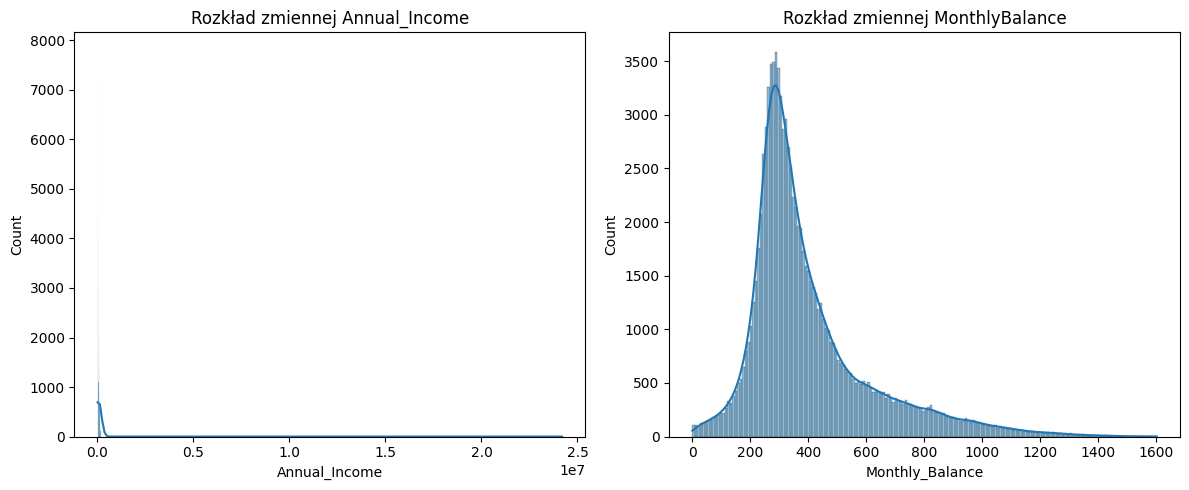

In [15]:
# Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual_Income'], kde=True)
plt.title('Rozkład zmiennej Annual_Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Monthly_Balance'], kde=True)
plt.title('Rozkład zmiennej MonthlyBalance')

plt.tight_layout()
plt.show()


usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [16]:
# Usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyżej 100 lat)
if 'Age' in df.columns:
    df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
    print("\nWartości odstające w kolumnie 'Age' zostały usunięte.")
else:
    print("\nKolumna 'Age' nie została znaleziona.")



Wartości odstające w kolumnie 'Age' zostały usunięte.


Zwizualizuj korelacje między zmiennymi

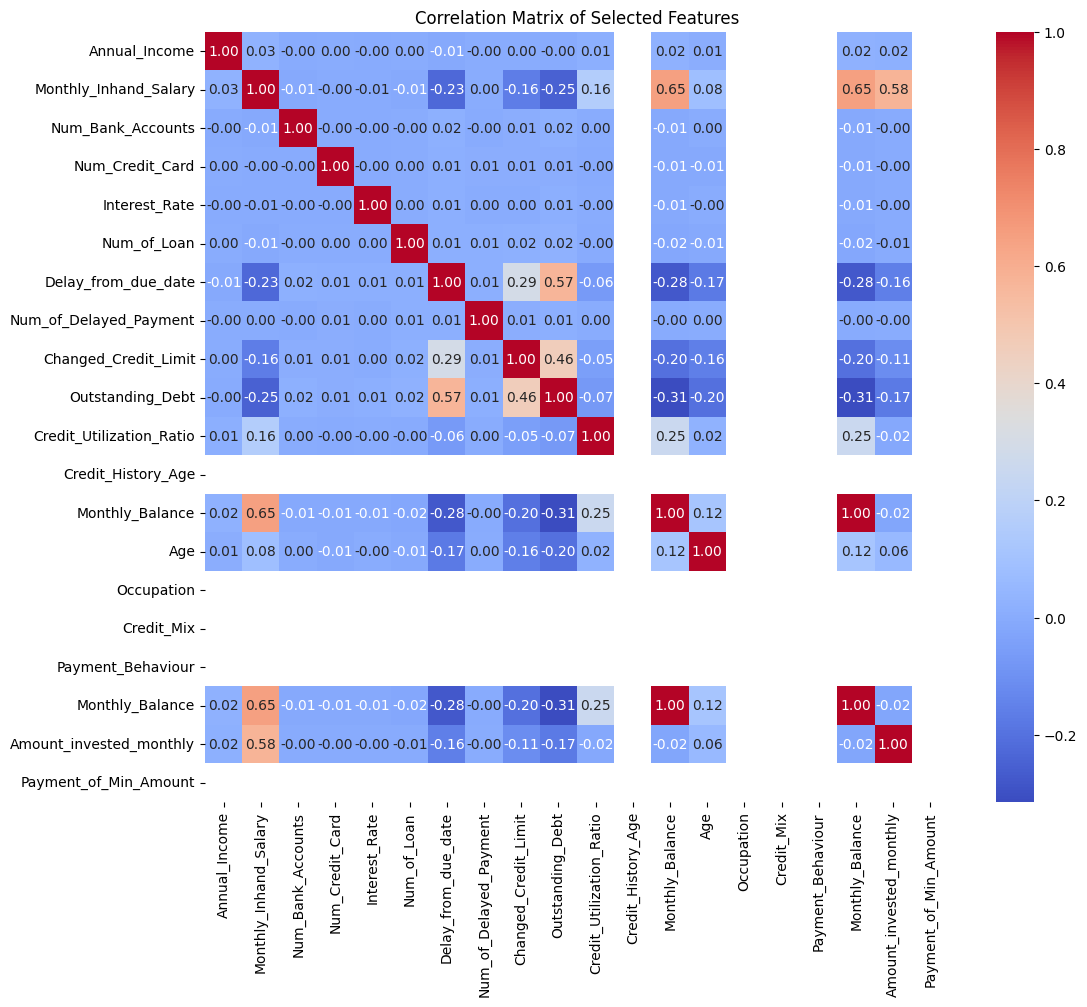

In [17]:
# prompt: Zależy mi żeby nie były brane wszystkie kolumny tak jak jest teraz tylko maks około 20. Zrób żęby te 20 kolumn było wybrane za pomocą listy. Na której umieścisz pierwotne kolumny. Dla tych kolumn stwórz macierz korelacji

import matplotlib.pyplot as plt
# Define the list of columns for correlation analysis
selected_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Monthly_Balance', 'Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Monthly_Balance', 'Amount_invested_monthly', 'Payment_of_Min_Amount']

# Check if all selected columns exist in the DataFrame
for col in selected_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame. It will be excluded from the analysis.")
        selected_columns.remove(col)

# Create the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [ ]:
df.head()

uzupełnij braki w kolumnie Monthly_Inhand_Salary, Annual_Income średnią
zastąp outliery (wartości poniżej 0 i powyżej 100) w kolumnie 'Age' średnią  
użyj IQR, aby wyznaczyć wartości odstające w kolumnie Annual_Income oraz Monthly_Inhand_Salary, następnie zastąp te wartości wartości medianą
zbadaj korelacje między zmiennymi, wyznacz heatmapę, wyznacz które kolumny mają korelacje wyższa niż 0.3
użyj MinMaxScaler’a do transformacji kolumn: ['Age', 'Annual_Income','Monthly_Inhand_Salary', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']
Wykorzystując dokumentację sklearn.decomposition, wykonaj na danych PCA, zachowując 90% wariancji

In [ ]:
# prompt: Wygeneruj kod do poleceń ppowyżej jeśli nie zostało to zrobione powużej


from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.decomposition import PCA
# ... (previous code from the provided input)

# Uzupełnij braki w kolumnie Monthly_Inhand_Salary, Annual_Income średnią
# Zastąp outliery (wartości poniżej 0 i powyżej 100) w kolumnie 'Age' średnią
if 'Age' in df.columns:
    df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = df['Age'].mean()

# Użyj IQR, aby wyznaczyć wartości odstające w kolumnie Annual_Income oraz Monthly_Inhand_Salary, następnie zastąp te wartości wartością medianą
for col in ['Annual_Income', 'Monthly_Inhand_Salary']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()

# Użyj MinMaxScaler’a do transformacji kolumn
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']
scaler = MinMaxScaler()
for col in columns_to_scale:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# Wykorzystując dokumentację sklearn.decomposition, wykonaj na danych PCA, zachowując 90% wariancji
pca = PCA(n_components=0.90)
pca.fit(df.select_dtypes(include=np.number)) # Fit only numerical columns
df_pca = pca.transform(df.select_dtypes(include=np.number))
df_pca = pd.DataFrame(df_pca)

print(df_pca.head())


<ipython-input-20-64c5d5a75a78>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
<ipython-input-20-64c5d5a75a78>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
<ipython-input-20-64c5d5a75a78>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta